##The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



####Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



####Attribute Information:

#####The explanations of sensor measurements and their brief statistics are given below.

#####Variable (Abbr.) Unit Min Max Mean
#####Ambient temperature (AT) C â€“6.23 37.10 17.71
#####Ambient pressure (AP) mbar 985.85 1036.56 1013.07
#####Ambient humidity (AH) (%) 24.08 100.20 77.87
#####Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
#####Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
#####Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
#####Turbine after temperature (TAT) C 511.04 550.61 546.16
#####Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
#####Turbine energy yield (TEY) MWH 100.02 179.50 133.51
#####Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
#####Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [20]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [4]:
data1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gas_turbines.csv")
data1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy


In [6]:
X=data1.iloc[:, 0:11]
Y=data1.iloc[:,7]

In [7]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [8]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [10]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [11]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Fit the model
history=model.fit(X, Y, validation_split=0.33, epochs=20, batch_size=10)

Epoch 1/20
1008/1008 [==============================] - 2s 2ms/step - loss: -42374402048.0000 - accuracy: 0.0000e+00 - val_loss: -43819266048.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
1008/1008 [==============================] - 2s 2ms/step - loss: -47921045504.0000 - accuracy: 0.0000e+00 - val_loss: -49425747968.0000 - val_accuracy: 0.0000e+00
Epoch 3/20
1008/1008 [==============================] - 2s 2ms/step - loss: -53911564288.0000 - accuracy: 0.0000e+00 - val_loss: -55469117440.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
1008/1008 [==============================] - 2s 2ms/step - loss: -60361506816.0000 - accuracy: 0.0000e+00 - val_loss: -61968564224.0000 - val_accuracy: 0.0000e+00
Epoch 5/20
1008/1008 [==============================] - 2s 2ms/step - loss: -67286818816.0000 - accuracy: 0.0000e+00 - val_loss: -68936261632.0000 - val_accuracy: 0.0000e+00
Epoch 6/20
1008/1008 [==============================] - 2s 2ms/step - loss: -74702503936.0000 - accuracy: 0.0000e+00 - val_loss: -

In [23]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 946us/step - loss: -244842053632.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


In [24]:
# Visualize training history

# list all data in history
model.history.history.keys()


dict_keys([])

In [15]:
import matplotlib.pyplot as plt


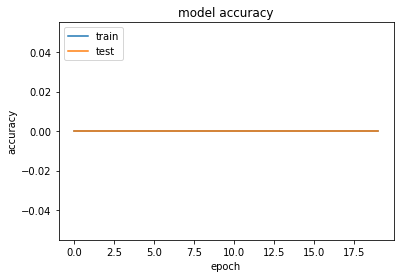

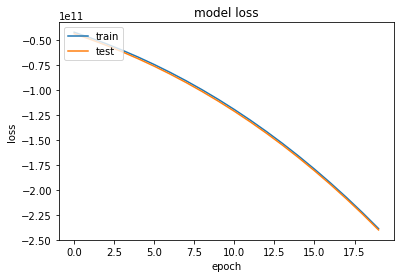

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
